In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
#sns.set(style="white")
%matplotlib inline

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [76]:
df  = pd.read_csv('heart_disease_health_indicators_BRFSS.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [78]:
df = df.replace(" ", np.nan).replace("?", np.nan).replace('!', np.nan)
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [79]:
df.duplicated().sum()

23899

In [80]:
df.drop_duplicates(keep=False,inplace=True)

In [81]:
df.duplicated().sum()

0

In [82]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 218594, dtype: bool

In [83]:
df.shape

(218594, 22)

In [84]:
df.dtypes.value_counts()

float64    22
dtype: int64

In [85]:
df.HeartDiseaseorAttack.value_counts()

0.0    195031
1.0     23563
Name: HeartDiseaseorAttack, dtype: int64

In [86]:
df1=df.copy()

In [87]:
df2=df.copy()

In [88]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.00000,218594.000000,218594.000000,218594.000000,...,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000,218594.000000
mean,0.107793,0.464377,0.448109,0.958091,28.819858,0.473911,0.04701,0.340179,0.721795,0.604303,...,0.943429,0.097441,2.641623,3.675412,4.906850,0.194781,0.437953,8.100227,4.951197,5.814478
std,0.310120,0.498731,0.497301,0.200381,6.881724,0.499320,0.21166,0.737205,0.448116,0.489001,...,0.231021,0.296558,1.065207,7.866525,9.211322,0.396033,0.496136,3.107447,0.996720,2.103832
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.00000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.00000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,3.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.00000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [89]:
somst = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 
       'Age','DiffWalk', 'Sex']

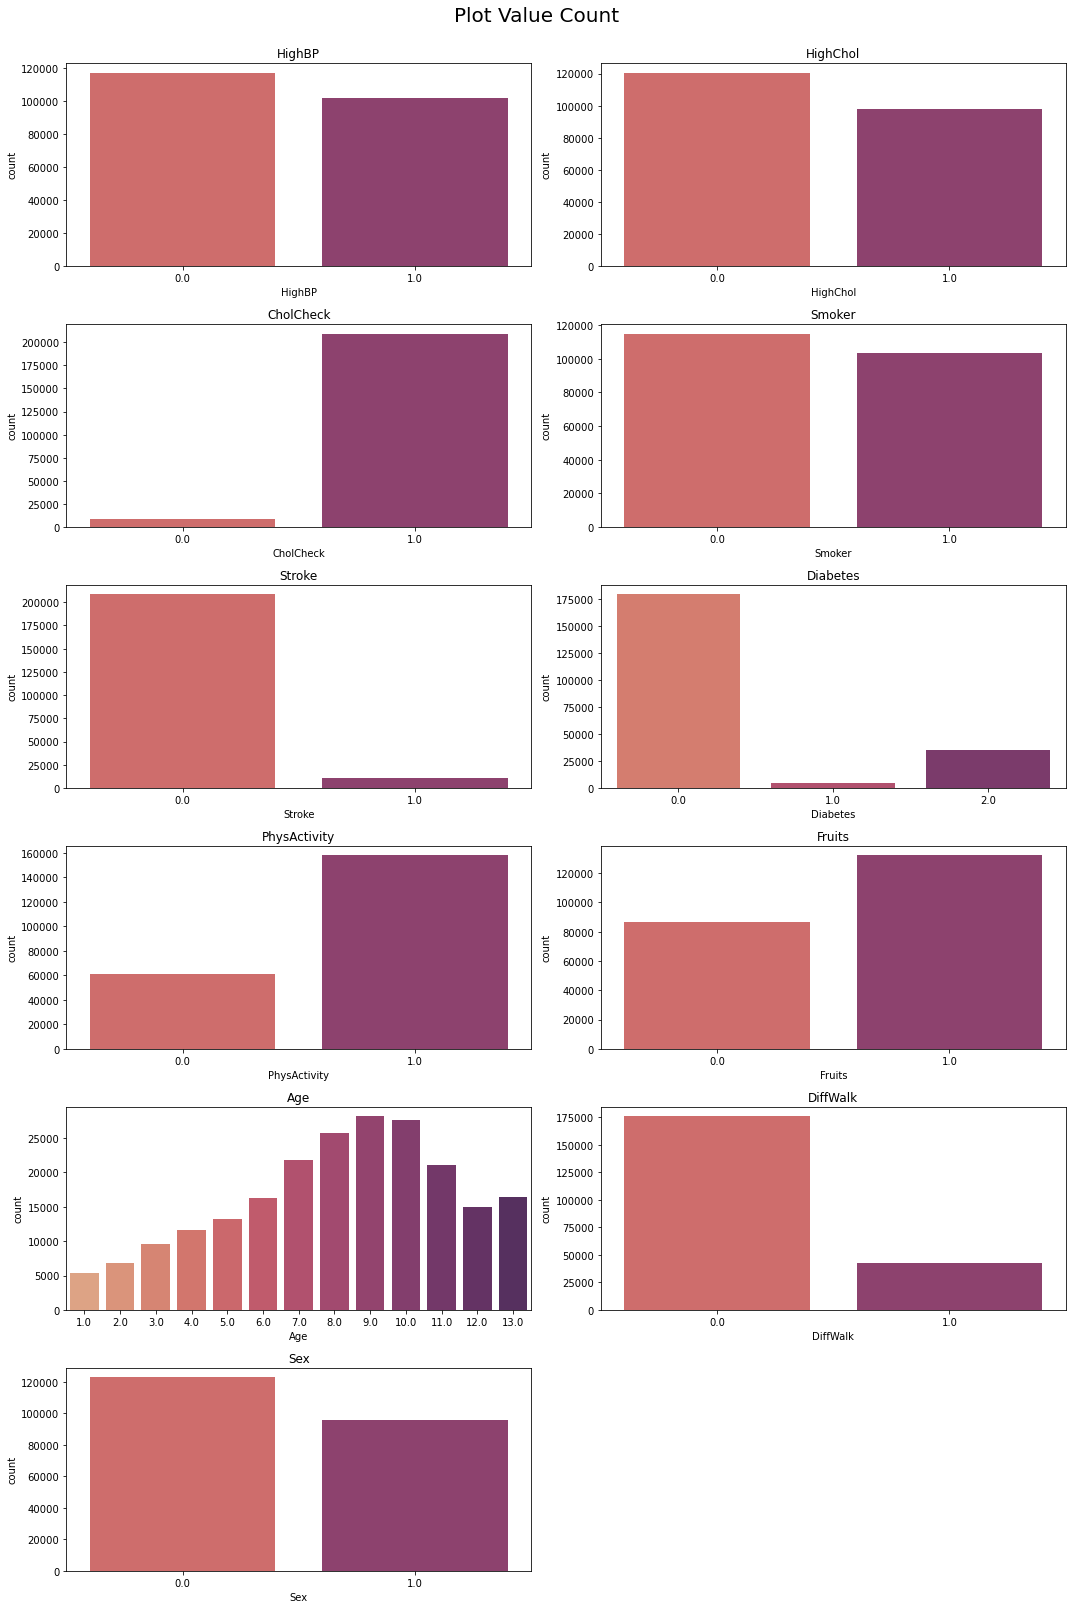

In [90]:
plt.figure(figsize=(15,40))
for i,column in enumerate(somst):
    plt.subplot(len(somst), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df1, x=column, palette='flare')
    plt.title(f"{column}")
    plt.tight_layout()

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

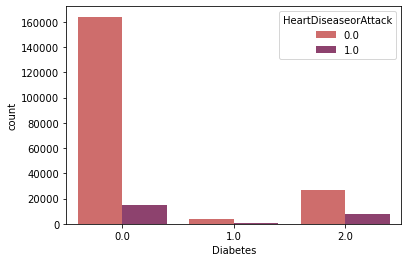

In [91]:
 sns.countplot(data=df1, x= 'Diabetes', hue='HeartDiseaseorAttack',palette='flare')

<AxesSubplot:xlabel='Diabetes', ylabel='Count'>

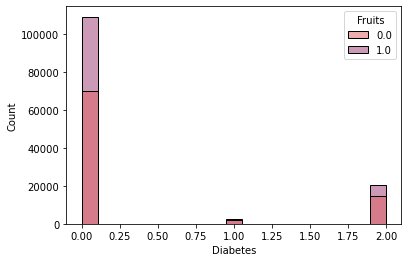

In [92]:
sns.histplot(x='Diabetes', data=df, hue='Fruits', palette='flare')

<AxesSubplot:xlabel='Age', ylabel='Count'>

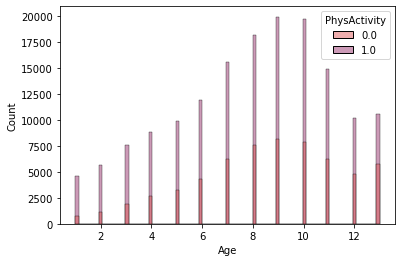

In [93]:
sns.histplot(x='Age', data=df1, hue='PhysActivity', palette='flare')

<AxesSubplot:xlabel='Smoker', ylabel='DiffWalk'>

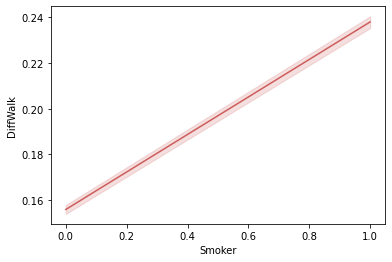

In [94]:
sns.lineplot(data=df1, x="Smoker", y="DiffWalk", color="indianred")

<AxesSubplot:xlabel='Age', ylabel='HeartDiseaseorAttack'>

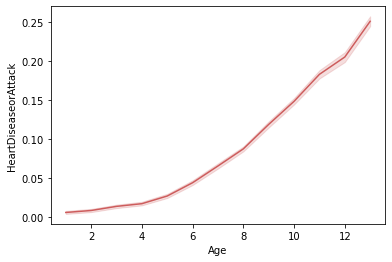

In [95]:
sns.lineplot(data=df1, x="Age", y="HeartDiseaseorAttack", color="indianred")

<AxesSubplot:xlabel='HighBP', ylabel='HighChol'>

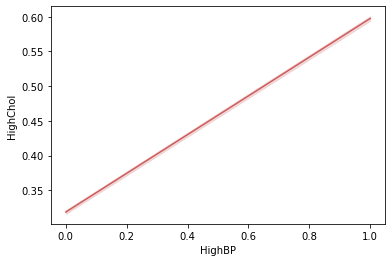

In [96]:
sns.lineplot(data=df1, x="HighBP", y="HighChol", color="indianred")

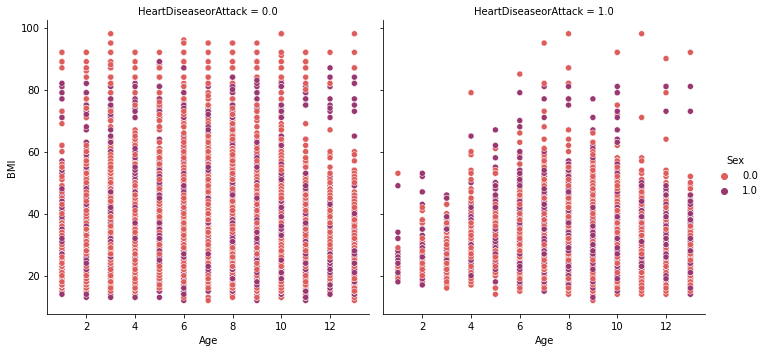

In [100]:
sns.relplot(x='Age', y ='BMI',hue='Sex', col ='HeartDiseaseorAttack',data=df1, palette='flare')

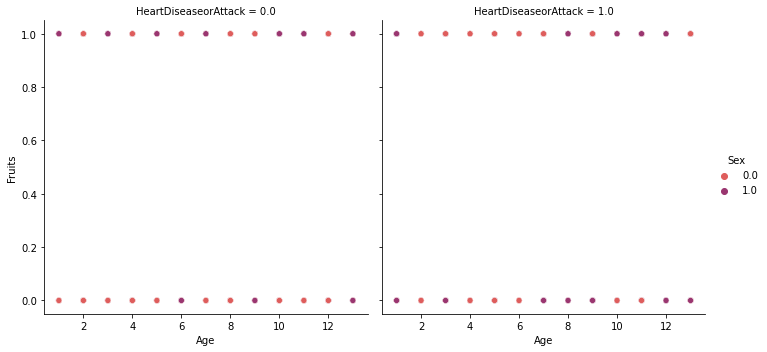

In [101]:
 sns.relplot(x='Age', y ='Fruits',hue='Sex', col ='HeartDiseaseorAttack',data=df1, palette='flare')

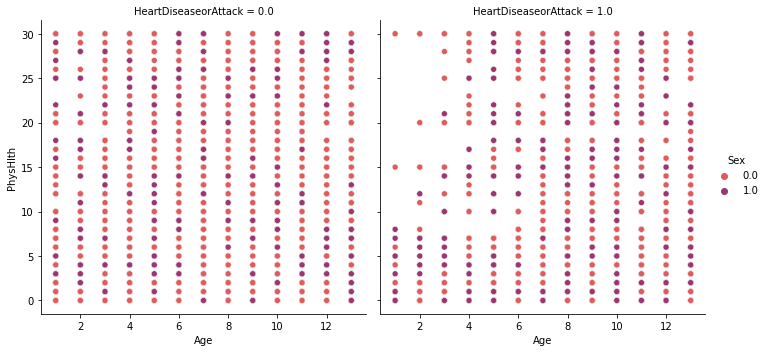

In [102]:
 sns.relplot(x='Age', y ='PhysHlth',hue='Sex', col ='HeartDiseaseorAttack',data=df1, palette='flare')

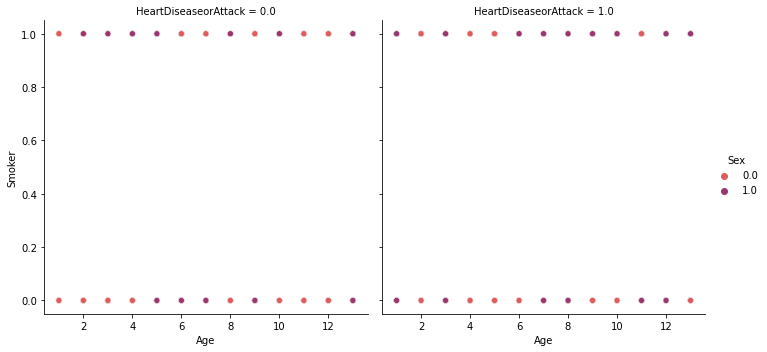

In [103]:
sns.relplot(x='Age', y ='Smoker',hue='Sex', col ='HeartDiseaseorAttack',data=df1, palette='flare')

In [104]:
vmot = ['HighBP', 'HighChol',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 
       'Age','DiffWalk', 'Sex']

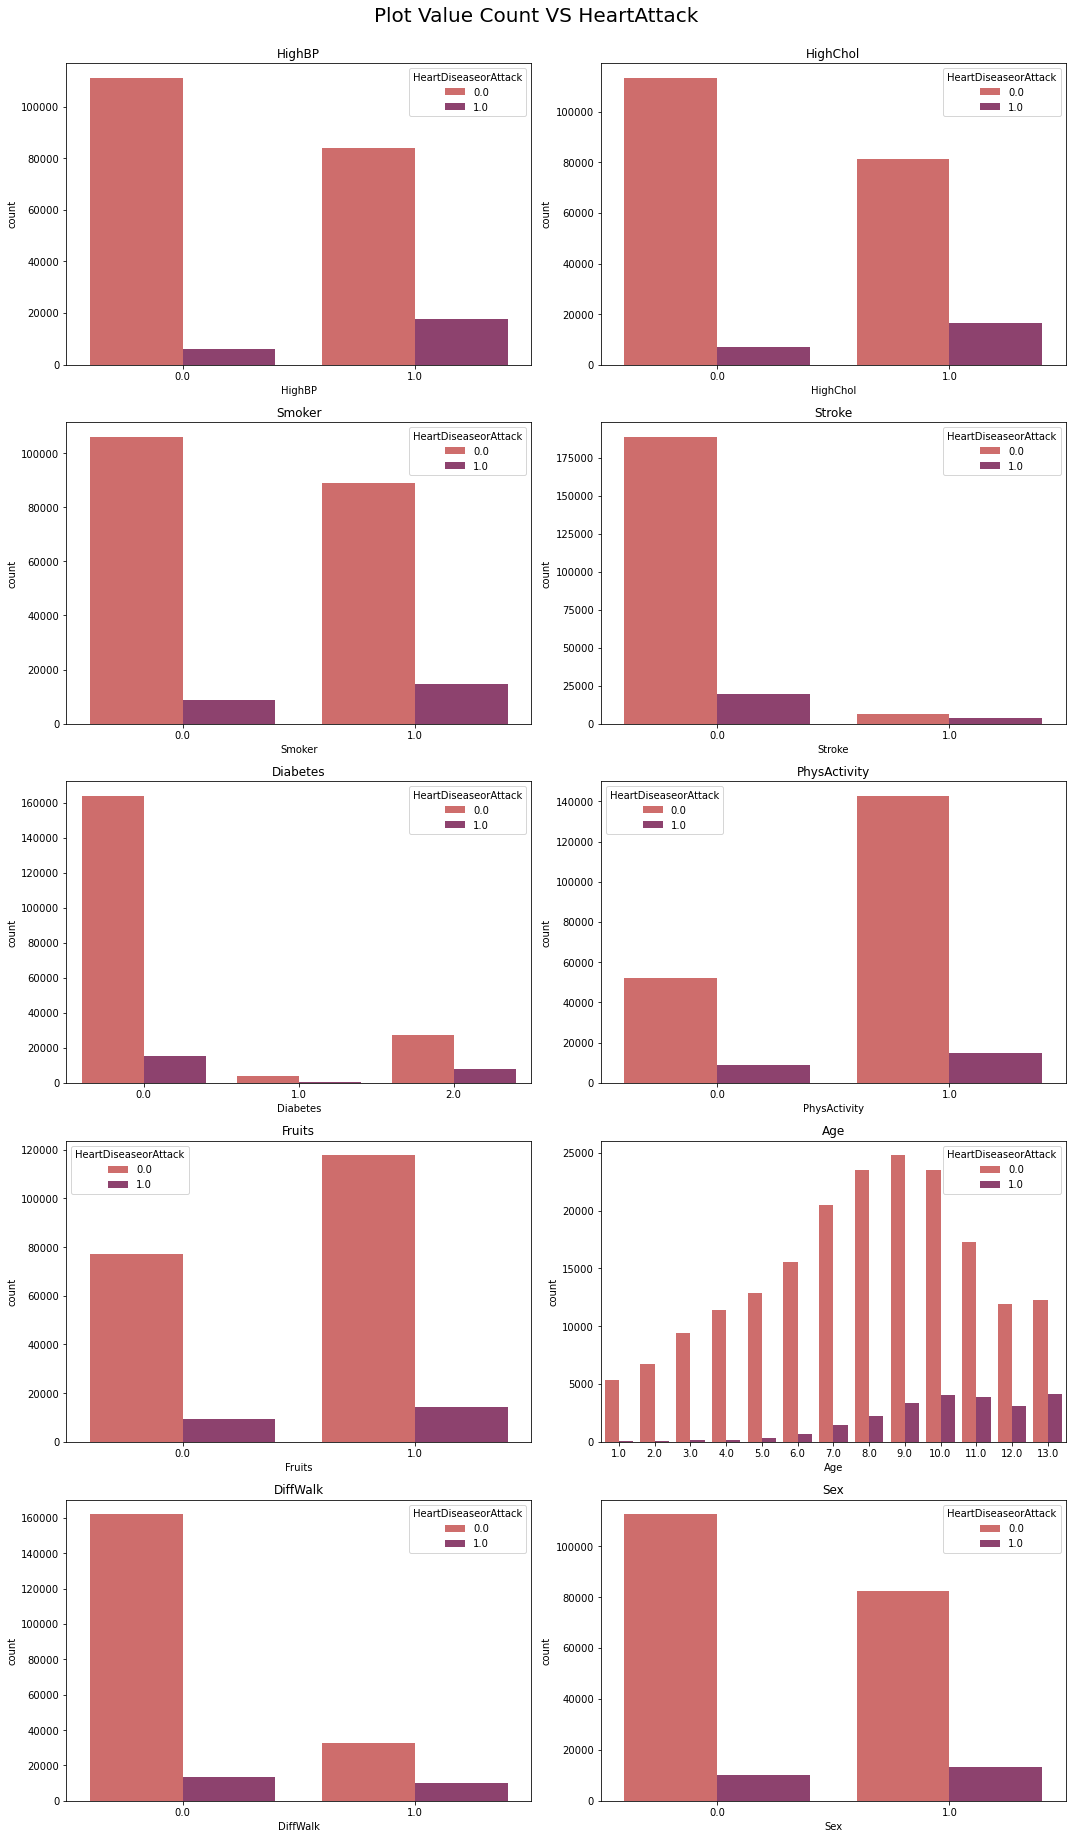

In [105]:
plt.figure(figsize=(15,50))
for i,column in enumerate(vmot):
    plt.subplot(len(vmot), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack',palette='flare')
    plt.title(f"{column}")
    plt.tight_layout()

In [106]:
somfe = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

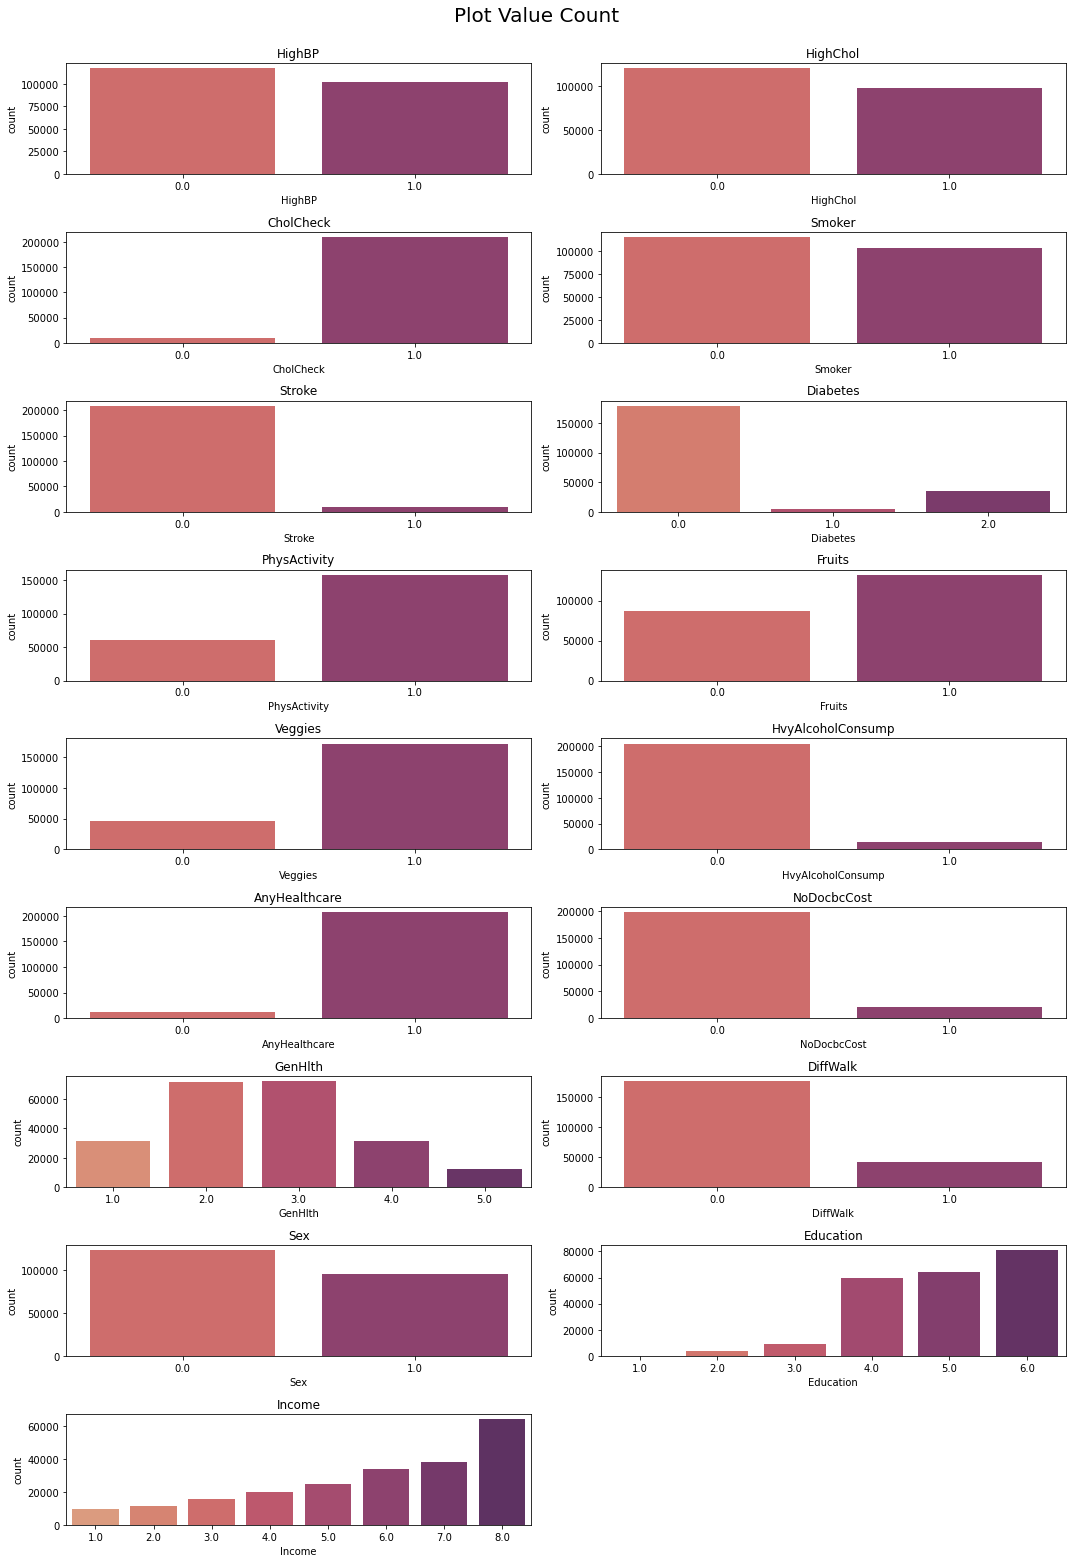

In [107]:
plt.figure(figsize=(15,40))
for i,column in enumerate(somfe):
    plt.subplot(len(somfe), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, palette='flare')
    plt.title(f"{column}")
    plt.tight_layout()

(22.5, 0.0)

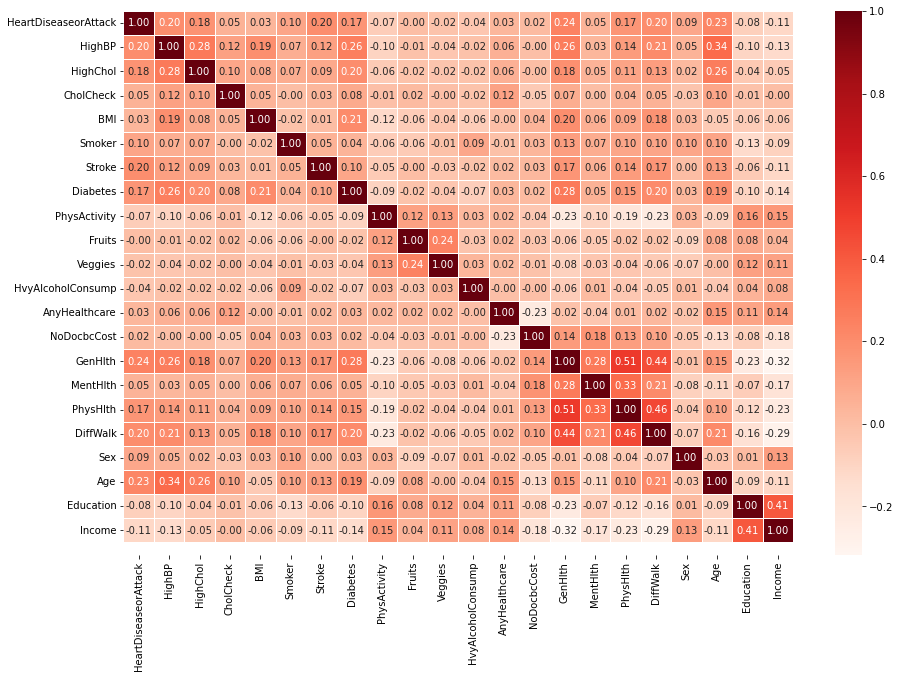

In [108]:
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='Reds')#PuRd
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

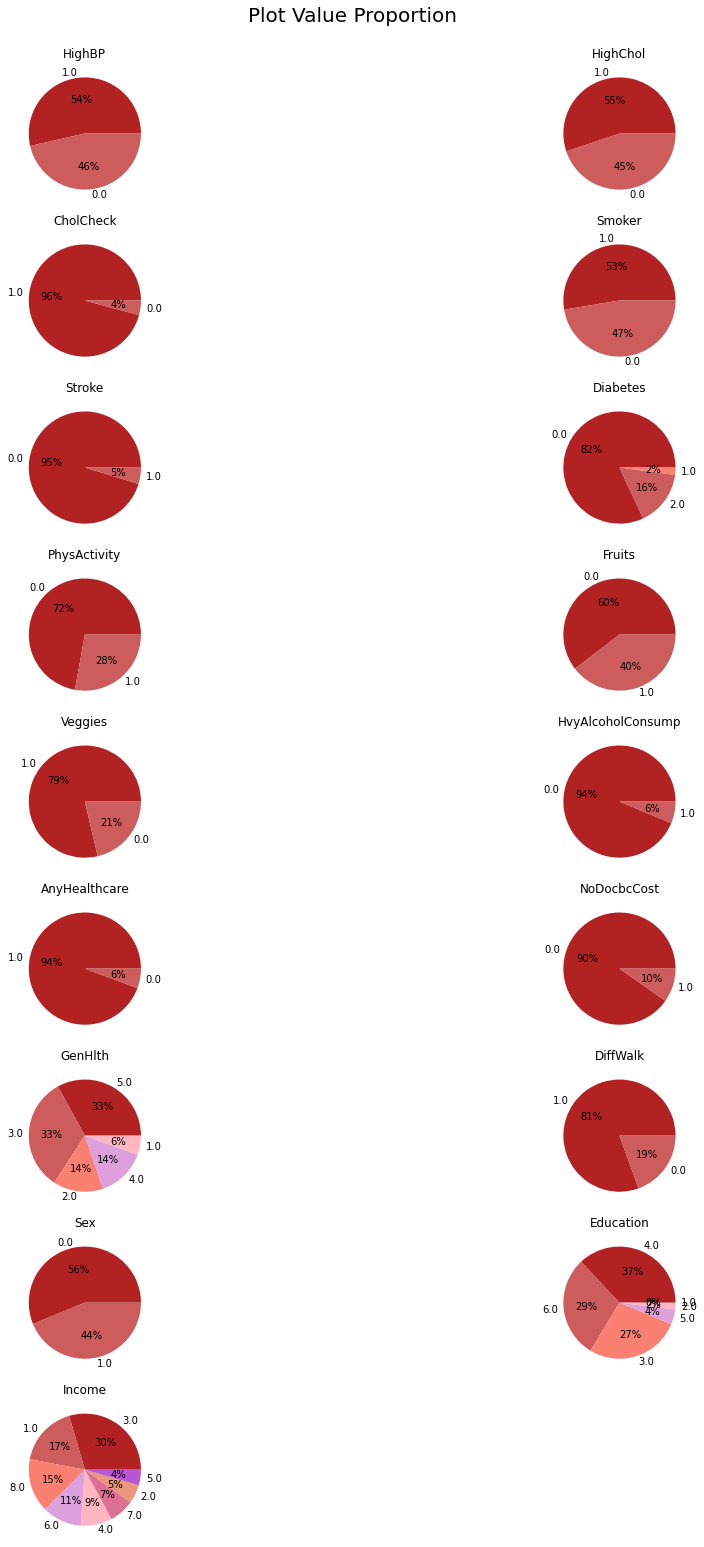

In [109]:
mycolors = [ "firebrick","indianred", "salmon","plum","lightpink", "palevioletred","darksalmon","mediumorchid"]
plt.figure(figsize=(15,40))
for i,column in enumerate(somfe):
    plt.subplot(len(somfe), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%', colors = mycolors)
    plt.title(f"{column}")
    plt.tight_layout()

<AxesSubplot:xlabel='BMI', ylabel='Count'>

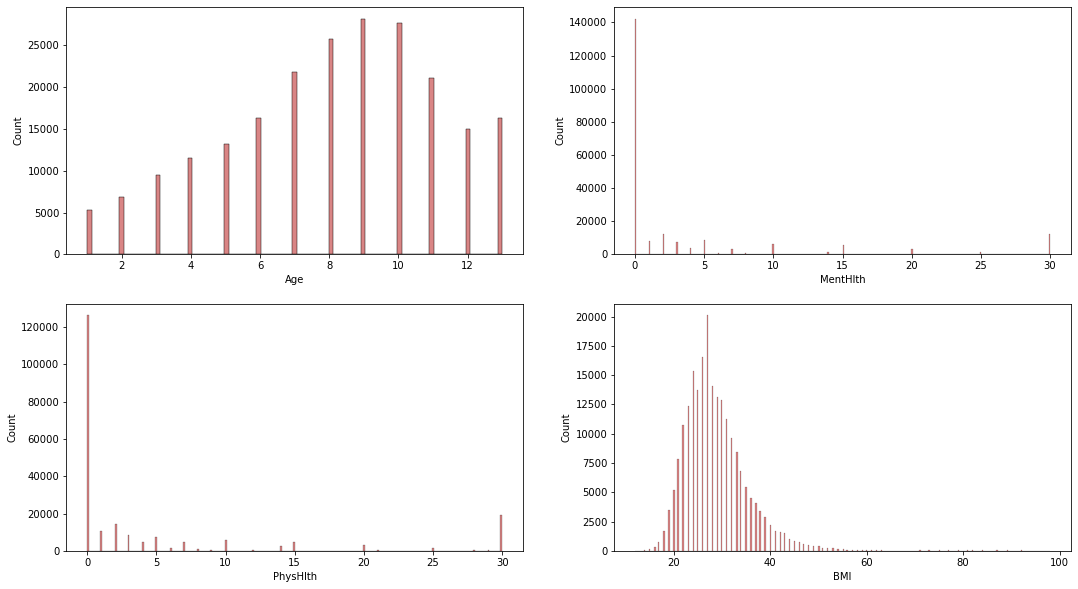

In [110]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0], color="indianred")
sns.histplot(ax=axes[0,1], data=df, x=distcol[1], color="indianred")
sns.histplot(ax=axes[1,0], data=df, x=distcol[2], color="indianred")
sns.histplot(ax=axes[1,1], data=df, x=distcol[3], color="indianred")

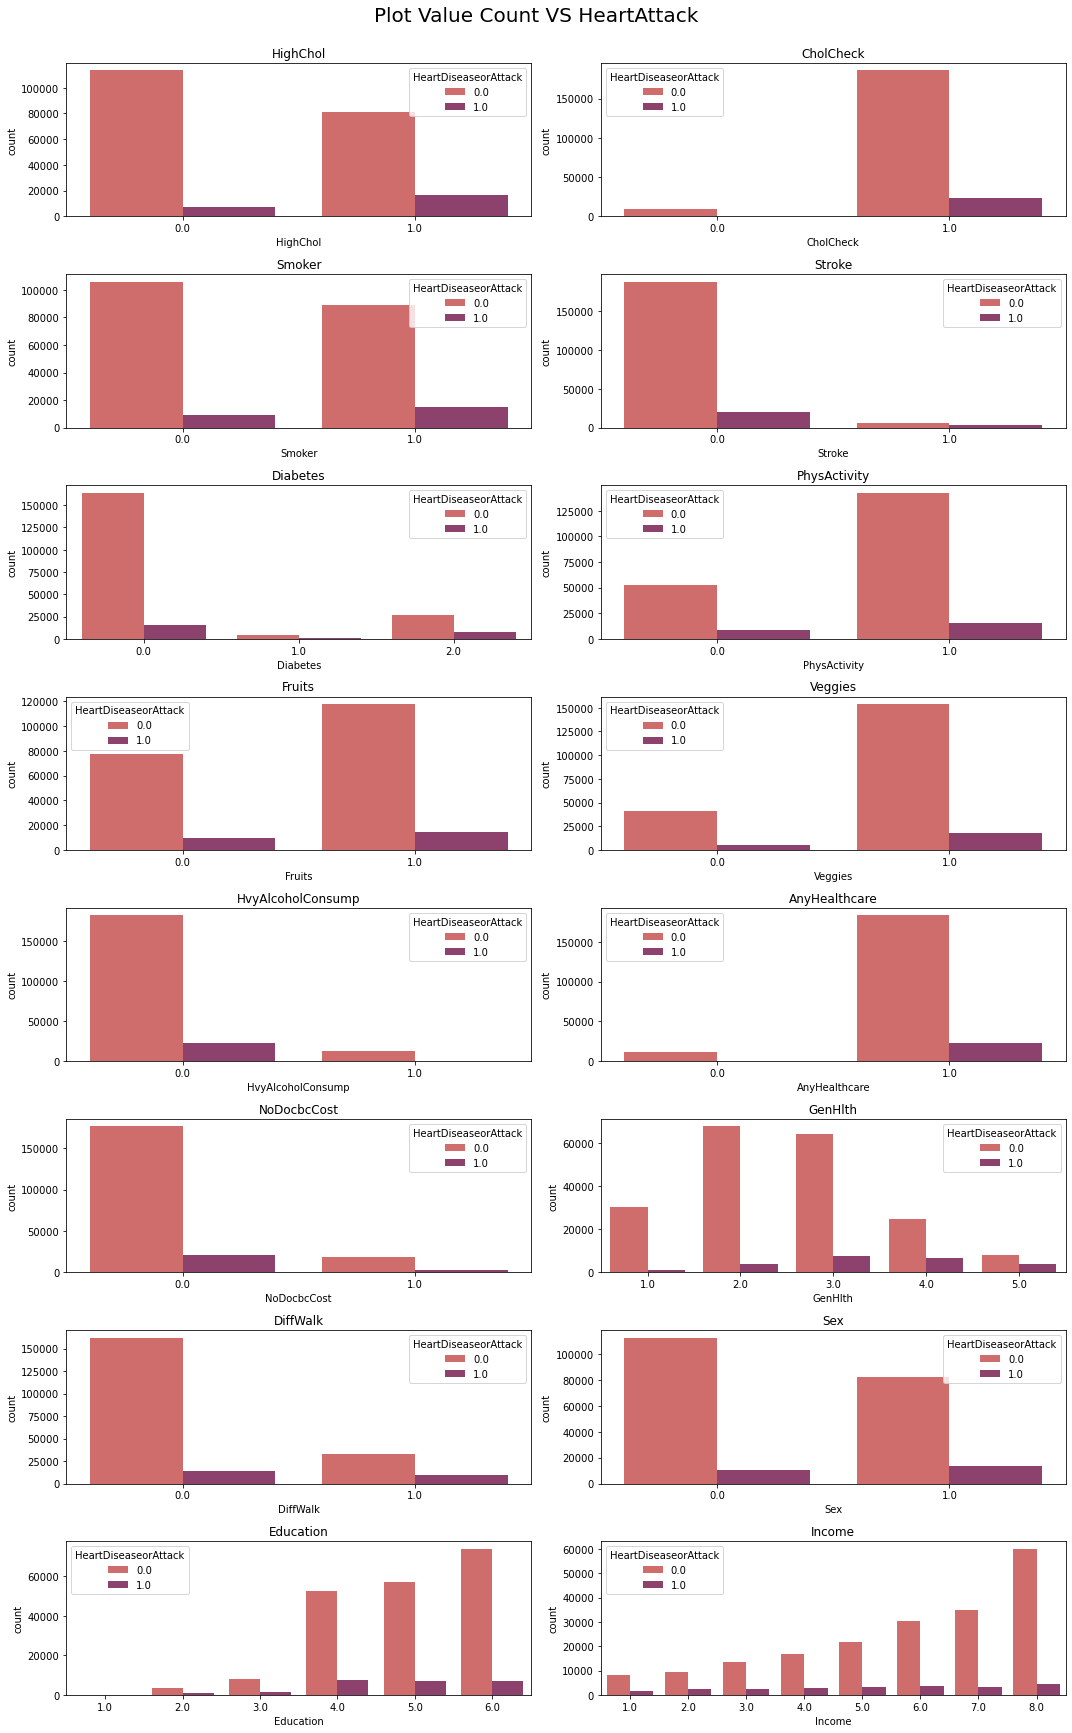

In [111]:
plt.figure(figsize=(15,50))
for i,column in enumerate(somfe[1:]):
    plt.subplot(len(somfe), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack',palette='flare')
    plt.title(f"{column}")
    plt.tight_layout()

In [112]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

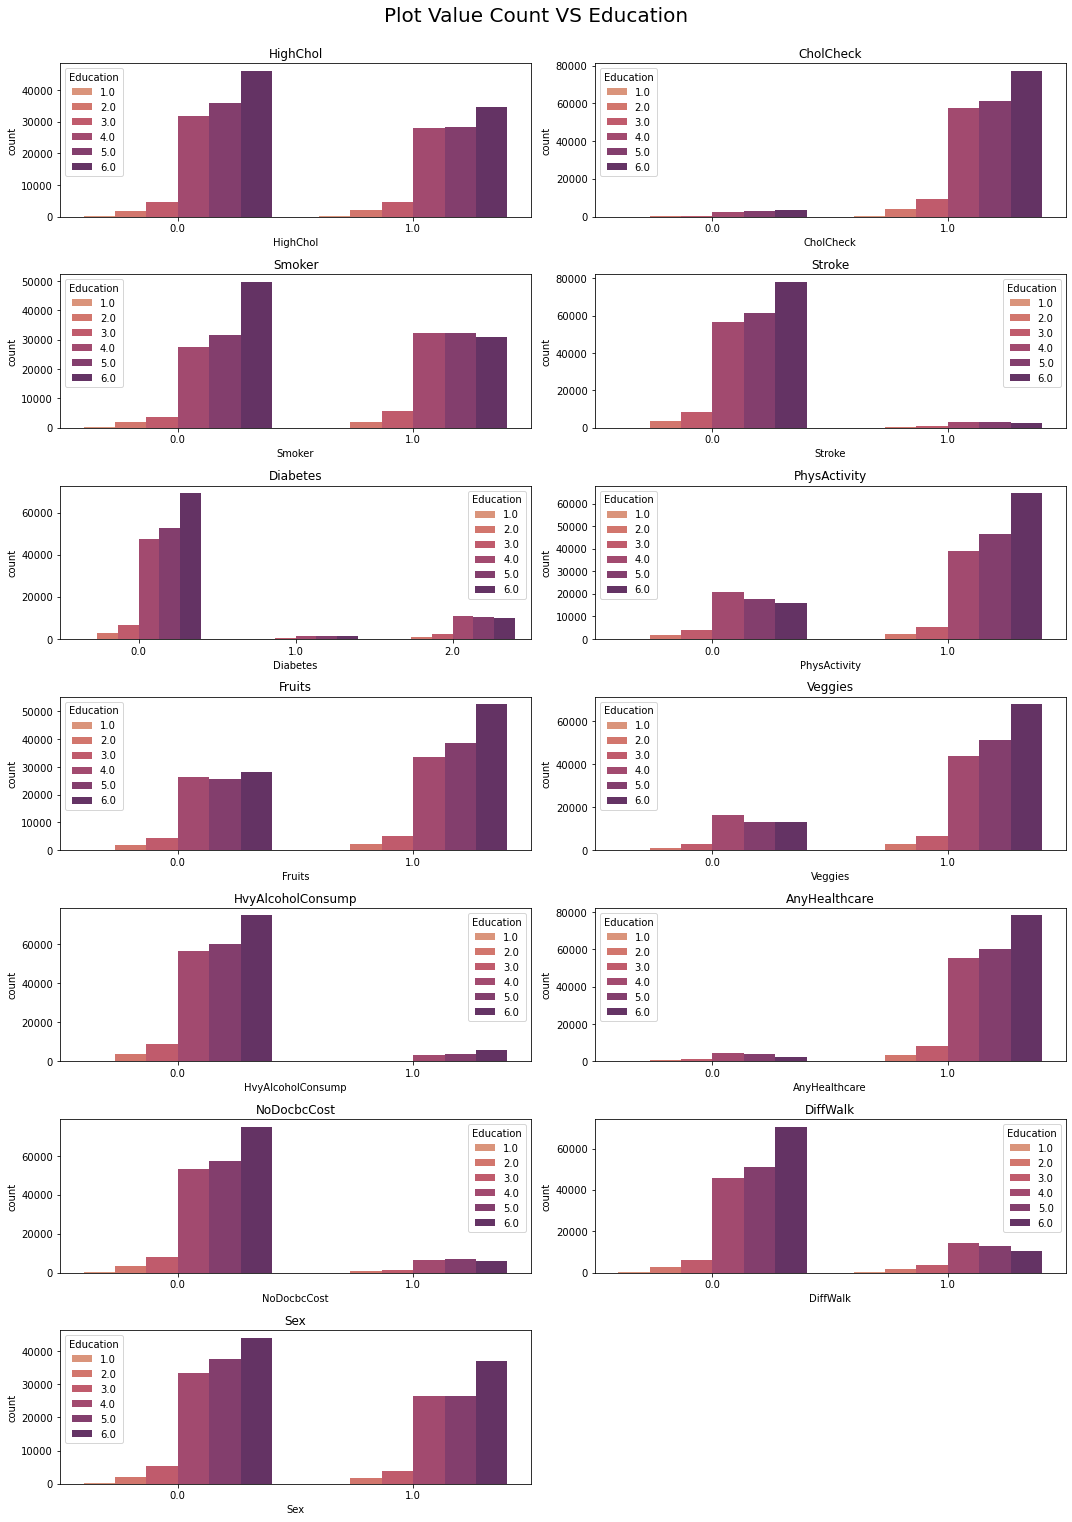

In [113]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(somfe), 2, i+1)
    plt.suptitle("Plot Value Count VS Education", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Education', palette='flare')
    plt.title(f"{column}")
    plt.tight_layout()

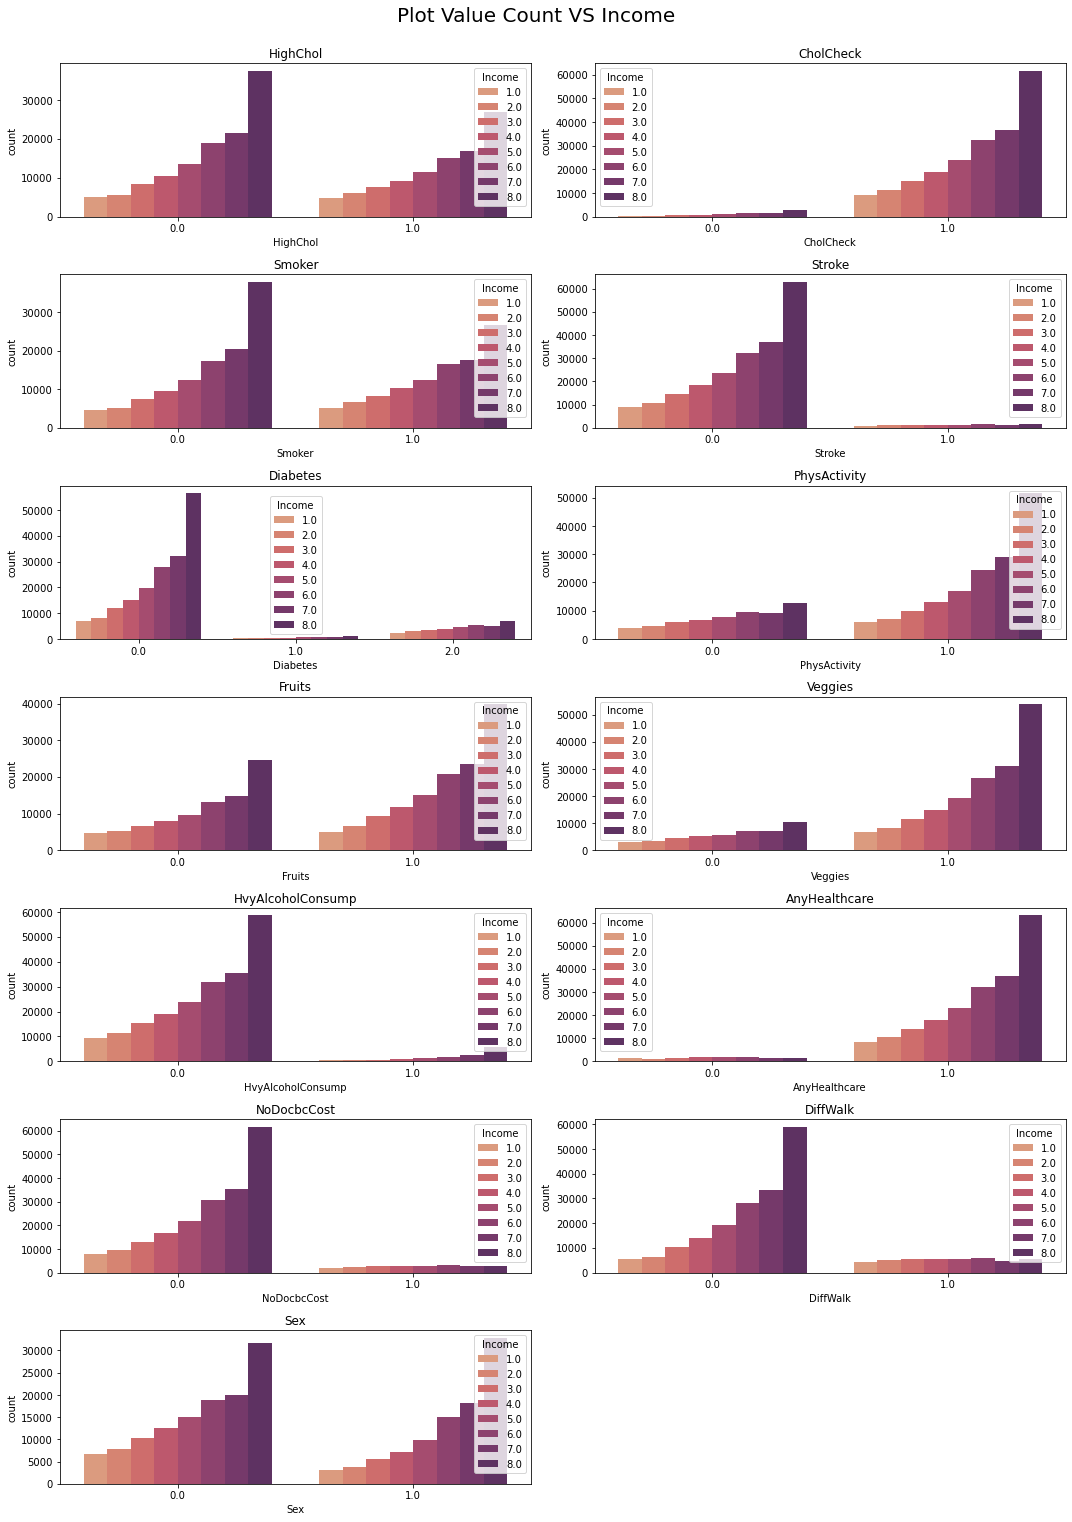

In [114]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(somfe), 2, i+1)
    plt.suptitle("Plot Value Count VS Income", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Income', palette='flare')
    plt.title(f"{column}")
    plt.tight_layout()

In [115]:
# MinMaxScaler
for feature in ['BMI', 'MentHlth', 'PhysHlth']: 
    df[feature] = df[feature].astype('int64')
    df[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[[feature]])

In [116]:
# Split column to Feature(X) and Target(Y)
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']

In [117]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [118]:
# The 3 models I've chosen for this dataset

models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'XGBClassifier': XGBClassifier(),
         'AdaBoostClassifier':AdaBoostClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier()}


def fit_and_score_models(models, X_train, X_test, Y_train, Y_test):
    """
    A function to fit and evaluate the specified ML models
    """
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [119]:
model_scores = fit_and_score_models(models, X_train, X_test, Y_train, Y_test)
model_scores

C:\Users\maarm\anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:43:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.8937075413435805,
 'KNN': 0.8804638715432649,
 'Random Forest': 0.8879663304284179,
 'XGBClassifier': 0.8921064068254078,
 'AdaBoostClassifier': 0.8930899608865711,
 'GradientBoostingClassifier': 0.8942336283995517}

### Logistic Regression seems to have scored the highest accuracy

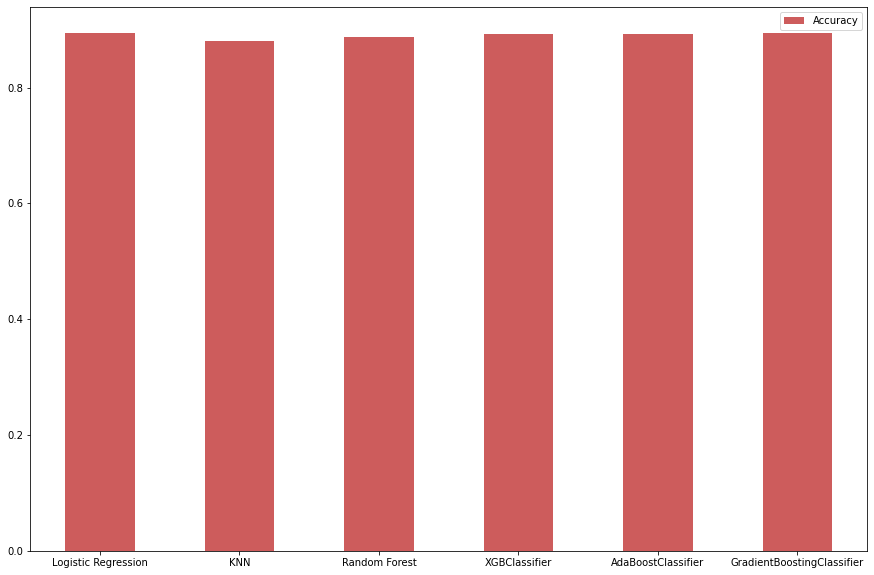

In [120]:
# Let's visualize the data
accuray_comparison_graph = pd.DataFrame(model_scores, index=['Accuracy']).T.plot.bar(figsize=(15,10),color="indianred")
plt.xticks(rotation=0); #color="indianred"

In [121]:
# MinMaxScaler
for feature in ['BMI', 'MentHlth', 'PhysHlth']: 
    df[feature] = df[feature].astype('int64')
    df[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[[feature]])

In [122]:
# Split column to Feature(X) and Target(Y)
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']

In [123]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=48)

In [124]:
# I will try some classifier algorithm and not tune the parameter, let it default
algorithm = [
#     LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

In [125]:
# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 88.2522%
Log Loss: 4.057550280624363


RandomForestClassifier
****Results****
Accuracy: 88.0601%
Log Loss: 4.123913380908994




C:\Users\maarm\anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:57:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 89.5194%
Log Loss: 3.6198681138632183


AdaBoostClassifier
****Results****
Accuracy: 89.5149%
Log Loss: 3.621450032738881


GradientBoostingClassifier
****Results****
Accuracy: 89.5423%
Log Loss: 3.611966713168396




In [26]:
# Because the Target is imbalance, i try to balance the data with SMOTE(OverSampling)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)


In [27]:
# Data with resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log_res = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(x_train_res, y_train_res)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry_res = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log_res = log_res.append(log_entry_res)
    
print("=" * 30)

C:\Users\maarm\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy: 75.3567%
Log Loss: 8.511657692017158


KNeighborsClassifier
****Results****
Accuracy: 76.9907%
Log Loss: 7.947283171040169


RandomForestClassifier
****Results****
Accuracy: 89.2818%
Log Loss: 3.7019719437772216




C:\Users\maarm\anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 90.5767%
Log Loss: 3.2546982360163614


AdaBoostClassifier
****Results****
Accuracy: 81.2027%
Log Loss: 6.492480309280038


GradientBoostingClassifier
****Results****
Accuracy: 84.7505%
Log Loss: 5.267087723256131


